## L1 - Linear models and gradient descent

### Books
1. [Deep Learning, I. Goodfellow, Y. Bengio and A. Courville](http://www.deeplearningbook.org/)
2. [Neural networks for pattern recognition, C. Bishop](http://cs.du.edu/~mitchell/mario_books/Neural_Networks_for_Pattern_Recognition_-_Christopher_Bishop.pdf)
3. [Machine learning: a probabilistic perspective, K. Murphy](http://dsd.future-lab.cn/members/2015nlp/Machine_Learning.pdf)

### 0. Basic classification

Here you can see basic (possible, non standard) classification of [machine learning](https://en.wikipedia.org/wiki/Machine_learning) tasks.
1. [Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning)
 1. [Regression](https://en.wikipedia.org/wiki/Regression_analysis)
 2. [Classification](https://en.wikipedia.org/wiki/Statistical_classification)
 3. [Ranking](https://en.wikipedia.org/wiki/Learning_to_rank)
2. [Reinforcment learning](https://en.wikipedia.org/wiki/Reinforcement_learning)
3. [Unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning)
 1. Clustering 
 2. Manifold learning
 3. Matrix decompostion (factorization)
 4. Dimension reduction
 
In this lab we consider only supervised learning. Namely, linear regression and binary linear classification, as simple methods for beginning.

### 1. Supervised learning basics
A supervised learning algorithm is an algorithm that is able to learn from data. Now we need only to clarify what is data and what it means to learn?

Let $\{x_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{X} = \mathbb{R}^{n}$ and $\{y_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{Y}$. Here $\mathbb{X}$ is the whole set of objects and $\mathbb{Y}$ is all possible labels of objects, so $\{x_i\}_{i=1}^{\mathcal{l}}$ is subset with known labels $\{y_i\}_{i=1}^{\mathcal{l}}$. We want to find algorithm, that can predict $y$ for any $x \in \mathbb{X}$. Actually, $x = (x^1, \dots, x^n)$ is some vector of features (formal description), but $x^k$ can have different nature. 

* $x^k \in \{0, 1\}$ – binary feature, boolean flag
* $x^k \in \{1,\dots, m\}$ – categorical (nominal), classification of entities into particular categories.
* $x^k \in \{1,\dots, m\}^<$ – ordinal, classification of entities in some kind of ordered relationship.
* $x^k \in \mathbb{R}$ – cardinal, classification based on a numerical value.

Categorical features are commonly encoded in some way (for exaple [one-hot encoding](https://en.wikipedia.org/wiki/One-hot)) to ignore false ordering (important for metric algorithms). Moreover it's possible to cast any type of feature to $\mathbb{R}$, that's why we suppouse that $\mathbb{X} = \mathbb{R}^{n}$ further.

Process of finding algorithm, that can predict labels, is called training. Usually, it is reduced to minimization problem of the empirical risk.
$$\arg \min_{\theta} Q(\theta) = \arg \min_{\theta} \frac{1}{\mathcal{l}}\sum_{i=1}^{\mathcal{l}} \mathcal{L}(f(x_i | \theta), y_i).$$
Here $\mathcal{L}$ – some loss function that shows how good we predict $y$, and $f(x|\theta)$ is parametric function, where $\theta \in \Theta$.

### 2. Linear regression
For regression task $\mathbb{Y} = \mathbb{R}$. In case of linear model we have learning vector of parameters $w \in \mathbb{R}^n$ and predict $y$ as 
$$y = w^Tx + b.$$

For simplicity, let the last element of $x$ is always $1$ and $w$ is concatenation of $[w, b]$. So, we can rewrite model as $y = w^Tx$. For MSE (mean square error) we have following optimization problem
$$\arg \min_{w} Q(w) = \arg \min_{w} \sum_{i=1}^{\mathcal{l}}\big(w^Tx_i - y_i\big)^2.$$

Let $X$ is matrix, where $i$-th row is feature vector of $i$-th object and $Y$ – vector of labels. In this case our expression can be rewritten in matrix form
$$\arg\min_{w}||Xw - Y ||_{2}.$$
But this problem is already well studied and has the analytical solution
$$w = (X^TX)^{-1}X^TY.$$

#### Exercises
1. Let $y = sin(x) + \varepsilon$, where $x \in [0, 2\pi]$ and $\varepsilon \sim \mathcal{N}(0, 0.1)$. Generate 20 train samples and try to learn regression model.
2. Plot train data and model's predictions.
3. As you see, model has no enough capacity to fit train data. Let's add polynomial features, namely $x^2$ and $x^3$.
4. Train linear model one more time and plot results again.
5. What happens if you add more features, for example full range $x^{0},\dots,x^{7}$? 

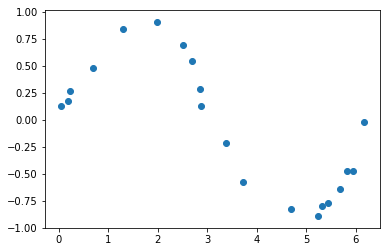

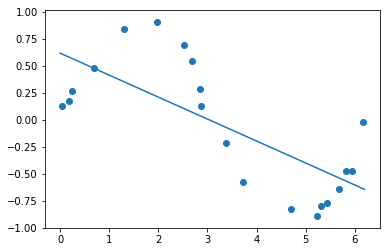

0.154719407743


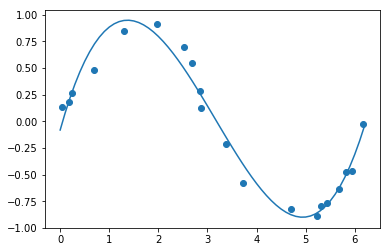

0.0115394830338


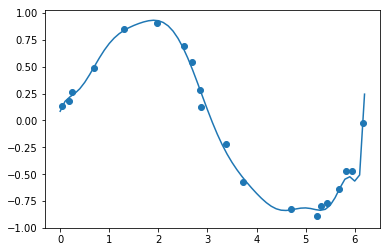

0.00300953517364


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
#https://ru.wikipedia.org/wiki/Преобразование_Бокса_—_Мюллера
def filling_data(mu,
                 sigma):
    n = 20
    train_data = np.zeros(n, dtype=np.float64)
    train_values = np.zeros(n, dtype=np.float64)
    for i in range(n):
        x = np.random.rand() * 2 * np.pi
        xi = sigma * np.random.randn() + mu
        y = np.sin(x) + xi
        train_data[i] = x
        train_values[i] = y
    return train_data, train_values
def training_linear (X_old,
                     Y):
    ones = np.ones(len(X_old))
    X = np.column_stack((X_old, ones)) 
    w = np.linalg.inv((X.T).dot(X))
    w = (w.dot(X.T)).dot(Y)
    return w, X
def training_polynomial (X_old,
                         Y):
    ones = np.ones(len(X_old))
    X_2 = list(map(lambda x: x ** 2, X_old))
    X_3 = list(map(lambda x: x ** 3, X_old))
    X = np.column_stack((X_3, X_2, X_old, ones)) 
    w = np.linalg.inv((X.T).dot(X))
    w = (w.dot(X.T)).dot(Y)
    return w, X
def training_over_polynomial (X_old,
                              Y):
    ones = np.ones(len(X_old))
    X = np.column_stack((X_old, ones))
    for i in range(2, 20):
        X_i = list(map(lambda x: x ** i, X_old))
        X = np.column_stack((X_i, X)) 
    w = np.linalg.inv((X.T).dot(X))
    w = (w.dot(X.T)).dot(Y)
    return w, X
def put_out(X,
            Y,
            func,
            w):
    plt.scatter(X, Y)
    P1 = np.arange(0, 2*np.pi, 0.1)
    P2 = np.arange(0, 2*np.pi, 0.1)
    if (func == training_linear):
        for i in range(len(P1)):
            P2[i]=(w[0] * (P1[i]) + w[1])
    elif (func == training_polynomial):
        for i in range(len(P1)):
            P2[i] = (w[0] * (P1[i] ** 3) + w[1] * (P1[i] ** 2) + w[2] * (P1[i]) + w[3])
    else:
        for i in range(63):
            x = 1
            P2[i] = 0
            for j in range(len(w) - 1, -1, -1):
                P2[i] += w[j] * x
                x *= P1[i]
    plt.plot(P1,P2)
    plt.show() 
def scale(X_old,
          Y,
          func,
          out=False):
    w, X = func(X_old, Y)
    if out:
        put_out(X_old, Y, func, w)
    Y_predict = X.dot(w)
    sum_of_mis = 0
    for i in range(len(Y)):
        sum_of_mis += (Y[i] - Y_predict[i]) ** 2
    print(sum_of_mis / len(Y))
train_data, train_values = filling_data(0, 0.1)
plt.scatter(train_data, train_values)
plt.show()
scale(train_data, train_values, training_linear, True)
scale(train_data, train_values, training_polynomial, True)
scale(train_data, train_values, training_over_polynomial, True)

### 3. Validation
The data used to build the final model usually comes from multiple datasets. In particular, three data sets are commonly used in different stages of the creation of the model.

1. We initially fit our parameters on a __training dataset__, that consists of pairs of a feature vector and the corresponding answer. The current model is run with the training dataset and produces a result, which is then compared with the target, for each input vector in the training dataset. Based on the result of the comparison and the specific learning algorithm being used, the parameters of the model are adjusted. The model fitting can include both variable selection and parameter estimation.

2. Second one called the __validation dataset__. The validation dataset provides an unbiased evaluation of a model fit on the training dataset while tuning the model's hyperparameters (e.g. regularization coefficient or number of hidden units in a neural network). Validation datasets can be used for regularization by early stopping: stop training when the error on the validation dataset increases, as this is a sign of overfitting to the training dataset. This simple procedure is complicated in practice by the fact that the validation dataset's error may fluctuate during training. This complication has led to the creation of many ad-hoc rules for deciding when overfitting has truly begun.

3. Finally, the __test dataset__ is a dataset used to provide an unbiased evaluation of a final trained model.

Cross-validation is a validation technique for estimating how accurately a predictive model will perform in practice. The goal of cross validation is to limit problems like overfitting, give an insight on how the model will generalize to an independent dataset.

Cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset and making validation on the other. To reduce variability, multiple rounds of cross-validation are performed using different partitions, and the validation results are caveraged over the rounds to estimate a final predictive model.

There are following types:
1. Leave-p-out cross-validation - using p observations as the validation set with all possible ways.
2. k-fold cross-validation - split data into k folds and using each one as validation set.
3. Holdout validation - randomly split data into training and validation set
4. Repeated random sub-sampling validation - repeatedly make random splits of data into training and validation set

#### Exercises
1. Generate 20 validation samples
2. Check quality of your model on train set and validation set.
3. Have you experienced [overfitting](https://en.wikipedia.org/wiki/Overfitting)?
4. Please, read [this article](https://en.wikipedia.org/wiki/VC_dimension) to learn more about model capacity and VC-dimension.

In [2]:
def filling_validation(mu,
                 sigma):
    n = 20
    validation_data = np.zeros(n, dtype=np.float64)
    validation_values = np.zeros(n, dtype=np.float64)
    for i in range(n):
        x = np.random.rand() * 2 * np.pi
        xi = sigma * np.random.randn() + mu
        y = np.sin(x) + xi
        validation_data[i] = x
        validation_values[i] = y
    return validation_data, validation_values
validation_data, validation_values = filling_validation(0, 0.1)
print("polynomial features")
scale(train_data, train_values, training_polynomial)
scale(validation_data, validation_values, training_polynomial)
print("full range  x0,…,x7")
scale(train_data, train_values, training_over_polynomial)
scale(validation_data, validation_values, training_over_polynomial)

polynomial features
0.0115394830338
0.0105042336073
full range  x0,…,x7
0.00300953517364
0.564202774694


### 4. Binary linear classification
Let $\mathbb{Y} = \{-1, +1\}$ for binary classification. So linear model looks like
$$sign(w^Tx + b),$$
where $w$ is normal to the separating plane, which is defined parametrically $w^Tx+b=0$. In the half-space, which normal is directed, all points has class +1, otherwise -1. Let's assume that all points of hyperplane has class +1 to resolve the ambiguity. Also we rewrite model in the short variant $sign(w^Tx)$.

As with regression, training of linear classifier may be reduced to an optimization problem. We only have to specify the loss function. The most nature option is
$$\mathcal{L}(y_{pred}, y_{true}) = [y_{pred} \neq y_{true}] = [M < 0],$$
where $M$ is the margin value $yw^Tx$, which indicates how far the classifier puts a point in its class. But this loss has one drawback, it's not differentiable. That's why the optimization problem becomes very complex. However we can use any other function, which majorizes this loss. You can find some popular options below

1. MSE has one big advantage, we optimize convex function with a local minimum. Moreover analytic solution exists.
$$\big(w^Tx - y \big)^2$$

2. Hinge loss function makes our linear classifier [SVM](https://en.wikipedia.org/wiki/Support_vector_machine) (support vector machine).
$$max \big(0, 1 - yw^Tx \big)$$

3. Logistic loss function has a probabilistic meaning. In particular, this loss leads us to the optimal [Bayesian classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) under certain assumptions on the distribution of features. But it's a different story. So it is often used in practice.
$$\ln \big( 1 + \exp(-yw^Tx) \big)$$

#### Exercises
1. #### Let $\mathbb{P}\{y=1|x\} = \sigma(wx)$, where $\sigma(z) = \frac{1}{1 + \exp(-z)}$. Show that problem below it is nothing like the maximization of the likelihood.
$$\arg\min_{w}Q(w) = \arg\min_{w} \sum_{x, y} \ln \big(1 + \exp(-yw^Tx )) \big)$$
2. Plot all loss functions in the axes $M \times L$.
3. Generate two normally distributed sets of points on the plane.
4. Let points of 1th set (red color) have class +1 and point of 2d set (blue color) have -1.
5. Train linear classifier with MSE (use analytical solution), which splits these sets.
6. Plot points and separating line of trained classifier.
7. #### What is time comlexity of your solution?

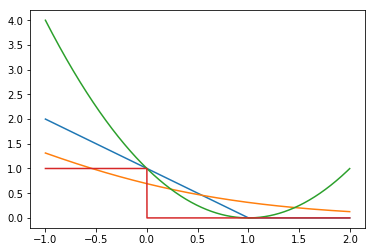

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
def hinge_loss(M):
    return max(0, 1 - M)
def logistic_loss(M):
    return np.log(1 + np.exp(-M))
def MSE(M):
    return (M-1) ** 2
def Ind(M):
    if M >= 0:
        return 0
    return 1
def plot(a, b, delta, func):
    P1 = np.arange(a, b, delta)
    P2 = np.arange(a, b, delta)
    for i in range(len(P1)):
        P2[i] = func(P1[i])
    plt.plot(P1,P2)
    #plt.show()
    
plot(-1, 2, 0.001, hinge_loss)
plot(-1, 2, 0.001, logistic_loss)
plot(-1, 2, 0.001, MSE)
plot(-1, 2, 0.00001, Ind)
plt.show()

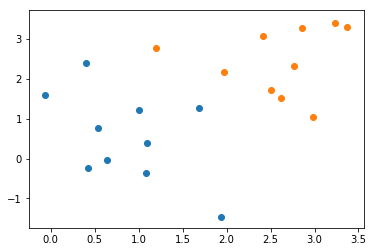

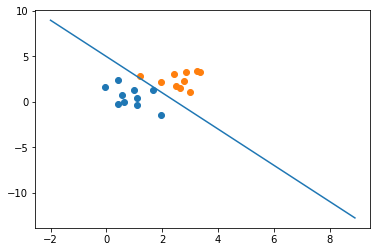

0.20041577719174136

In [4]:
def filling_data(mu,
                 sigma,
                 mu1,
                 sigma1):
    n = 10
    train_data = np.zeros((2 * n, 2), dtype=np.float64)
    train_values = np.zeros(2 * n)
    for i in range(n):
        x = sigma * np.random.randn() + mu
        y = sigma * np.random.randn() + mu
        train_data[i][0] = x
        train_data[i][1] = y
        train_values[i] = 1
        
    for i in range(n, 2 * n):
        x = sigma1 * np.random.randn() + mu1
        y = sigma1 * np.random.randn() + mu1
        train_data[i][0] = x
        train_data[i][1] = y
        train_values[i] = -1
    return train_data, train_values
def put_out(X, Y, w):
    plt.scatter(list(map(lambda x: x[0], X[:n // 2])),list(map(lambda x: x[1], X[:n // 2])))
    plt.scatter(list(map(lambda x: x[0], X[n // 2:])),list(map(lambda x: x[1], X[n // 2:])))
    P1 = np.arange(-2, 9, 0.1, dtype=np.float64)
    P2 = np.arange(-2, 9, 0.1, dtype=np.float64)
    if w[1] == 0:
        w[1] = 0.0001
    for i in range(len(P1)):
        P2[i] = -w[0] / w[1] * P1[i] - w[2] / w[1]
    plt.plot(P1,P2)
    plt.show()

def training_linear (X_old,
                     Y):
    ones = np.ones(len(X_old))
    X = np.column_stack((X_old, ones)) 
    w = np.linalg.inv((X.T).dot(X))
    w = (w.dot(X.T)).dot(Y)
    return w, X

def train_with_MSE(X_old, Y, out=False):
    w, X = training_linear(X_old, Y)
    Y_predict = X.dot(w.T)
    if out:
        put_out(X_old, Y, w)
    MSE = 0
    for i in range(len(Y)):
        MSE += (Y[i] - Y_predict[i]) ** 2
    MSE /= len(Y)
    return MSE
n = len(train_data)
train_data, train_values = filling_data(1, 1, 3, 1)
plt.scatter(list(map(lambda x: x[0], train_data[:n // 2])),
            list(map(lambda x: x[1], train_data[:n // 2])))
plt.scatter(list(map(lambda x: x[0], train_data[n // 2:])),
            list(map(lambda x: x[1], train_data[n // 2:])))
plt.show()
train_with_MSE(train_data, train_values, True)
#print(train_data, train_values)

### 5. Gradient descent
Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient of the function at the current point. Gradient descent is based on the observation that if function $Q(x)$ is defined and differentiable in a neighborhood of a point $x$, then $Q(x)$ decreases fastest if one goes from $x$  in the direction of the negative gradient.

$$x^{k+1} = x^{k} - \lambda \cdot \triangledown Q(x)$$

Here $\lambda$ is step of descent and  $k$ – step number. If $\lambda$ is too large then algorithm may not converge, otherwise training can last a long time. Also there is rather popular hack to slowly decrease $\lambda$ with each step. You need to understand that gradient descent finds exactly local minimum. The easiest way to fight this problem is make several runs of algorithm or have good initialization.

#### Exercises
1. Suggest some quadratic function $Q: \mathbb{R}^2 \rightarrow \mathbb{R}$ with global minimum.
2. Find minimum with gradient descent method.
3. Plot contour lines.
4. Trace the path of gradient descent.
5. #### How do you choose $\lambda$?
6. #### Evaluate time complexity of solution.

In [3]:
#f(x, y) = (x - 1) ** 2 + (x - y) ** 2 = 2x^2 - 2x + 1 -2xy + y^2
#gard(x0, y0) = (4x - 2 - 2y)i + (-2x + 2y)j = (4x0 - 2y0 - 2, -2x0 + 2y0)
lamb = 0.1
EPS = 0.1 ** 4
X_plot = []
Y_plot = []
def f(x, y):
    return (x - 1) ** 2 + (x - y) ** 2
def grad(point):
    x0 = point[0]
    y0 = point[1]
    return [4 * x0 - 2 * y0 - 2, -2 * x0 + 2 * y0]
def gradient_descent(f, grad):
    X_plot.clear(); Y_plot.clear()
    point = np.array([np.random.rand() * 200 - 100, np.random.rand() * 200 - 100], dtype=np.float64)
    X_plot.append(point[0])
    Y_plot.append(point[1])
    grad_vec = np.array([1, 1], dtype=np.float64)
    while abs(grad_vec[0]) > EPS or abs(grad_vec[1]) > EPS:
        grad_vec = grad(point)
        point[0] -= lamb * grad_vec[0]
        point[1] -= lamb * grad_vec[1]
        X_plot.append(point[0])
        Y_plot.append(point[1])
    return (point)
local_min = gradient_descent(f, grad)
print(local_min)

[ 0.9999266   0.99988124]


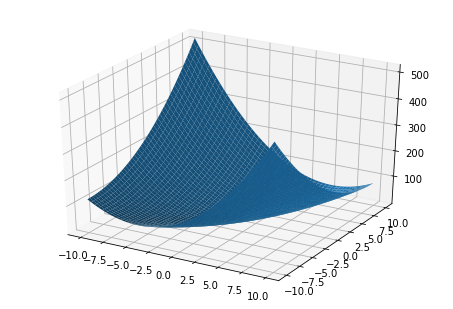

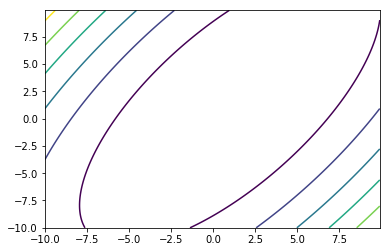

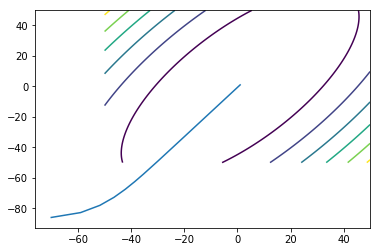

In [4]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def prep_for_out(f, a, b, delta):
    x0 = np.arange(a, b, delta)
    y0 = np.arange(a, b, delta)
    x, y = np.meshgrid(x0, y0)
    z = f(x, y)
    return x, y, z
def stereo(f, a=-10, b=10, delta=0.1):
    x, y, z = prep_for_out(f, a, b, delta)
    fig = pylab.figure()
    axes = Axes3D(fig)
    axes.plot_surface(x, y, z)
    pylab.show()
def contour(f, a=-10, b=10, delta=0.1):
    x, y, z = prep_for_out(f, a, b, delta)
    pylab.contour(x, y, z)
    pylab.show()
def trace(f, X, Y, a=-10, b=10, delta=0.1):
    x, y, z = prep_for_out(f, a, b, delta)
    pylab.plot(X, Y)
    pylab.contour(x, y, z)
    pylab.show()
stereo(f)
contour(f)
trace(f, X_plot, Y_plot, -50, 50)

There is category of function which naive gradient descent works poorly for, e.g. [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function).
$$f(x, y) = (1-x)^2 + 100(y-x^2)^2.$$

#### Exercises
1. Repeat previous steps for Rosenbrock function.
2. What problem do you face?
3. #### Is there any solution?

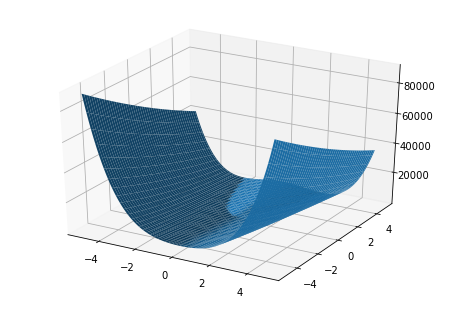

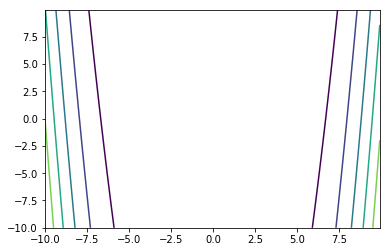

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


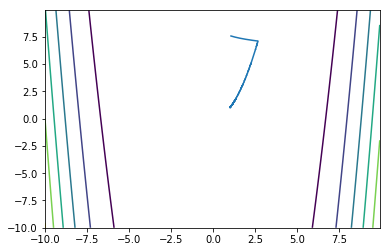

[ 0.99915766  1.00018547]


In [10]:
#f(x, y) = (x - 1) ** 2 + 100(x^2 - y) ** 2 = x^2 - 2x + 1 + 100x^4 - 200x^2y + 100y^2
#gard(x0, y0) = (2x - 2 + 400x^3 - 400xy)i + (-200x^2 + 200y)j =
                #(2x0 - 2 + 400x0^3 - 400x0y0, -200x0^2 + 200y0)
lamb = 0.01
EPS = 0.1 ** 10
X_plot = []
Y_plot = []
def f1(x, y):
    return (x - 1) ** 2 + 100 * (x ** 2 - y) ** 2
def grad1(point):
    x0 = point[0]
    y0 = point[1]
    new_point = np.array([2 * x0 - 2 + 400 * x0 ** 3 - 400 * x0 * y0,
            -200 * x0 ** 2 + 200 * y0])
    return new_point
def gradient_descent_(f, grad):
    X_plot.clear(); Y_plot.clear()
    point = np.array([np.random.rand() * 20 - 10, np.random.rand() * 20 - 10], dtype=np.float64)
    X_plot.append(point[0])
    Y_plot.append(point[1])
    grad_vec = np.array([1, 1], dtype=np.float64)
    k = 0
    cur_f = f(point[0], point[1])
    prev_f = 10 ** 10
    while np.abs(prev_f - cur_f) > EPS and k < 10 ** 6:
        k += 1
        if k % 100000 == 0:
            print(k)
        grad_vec = grad(point)
        lamb = 0.001 / max(abs(grad_vec[0]), abs(grad_vec[1]))
        prev_f = cur_f
        point[0] -= lamb * grad_vec[0]
        point[1] -= lamb * grad_vec[1]
        cur_f = f(point[0], point[1])
        X_plot.append(point[0])
        Y_plot.append(point[1])
    return (point)
stereo(f1, -5, 5)
contour(f1)
local_min = gradient_descent_(f1, grad1)
trace(f1, X_plot, Y_plot, -10, 10)
print(local_min)

There are some variations of the method, for example steepest descent, where we find optimal $\lambda$ for each step.
$$\lambda^{k} = \arg\min_{\lambda}Q(x_k - \lambda\triangledown Q(x_k)).$$

#### Exercises
1. Split red and blue sets of points again. Train linear model using gradient descent and MSE.
2. Plot your splitting line. Compare with analytical solution.
3. Try steepest descent.
4. Comare gradient descent methods and show its convergence in axes $[step \times Q]$.

In [17]:
def filling_data(mu,
                 sigma,
                 mu1,
                 sigma1):
    n = 10
    train_data = np.zeros((2 * n, 2), dtype=np.float64)
    train_values = np.zeros(2 * n)
    for i in range(n):
        x = sigma * np.random.randn() + mu
        y = sigma * np.random.randn() + mu
        train_data[i][0] = x
        train_data[i][1] = y
        train_values[i] = 1
        
    for i in range(n, 2 * n):
        x = sigma1 * np.random.randn() + mu1
        y = sigma1 * np.random.randn() + mu1
        train_data[i][0] = x
        train_data[i][1] = y
        train_values[i] = -1
    return train_data, train_values
def put_out(X, Y, w):
    plt.scatter(list(map(lambda x: x[0], X[:n // 2])),list(map(lambda x: x[1], X[:n // 2])))
    plt.scatter(list(map(lambda x: x[0], X[n // 2:])),list(map(lambda x: x[1], X[n // 2:])))
    P1 = np.arange(-2, 9, 0.1, dtype=np.float64)
    P2 = np.arange(-2, 9, 0.1, dtype=np.float64)
    for i in range(len(P1)):
        P2[i] = -w[0] / w[1] * P1[i] - w[2] / w[1]
    plt.plot(P1, P2)
    plt.show()
def make_prop(X_old):
    ones = np.ones(len(X_old))
    X = np.column_stack((X_old, ones))
    return X

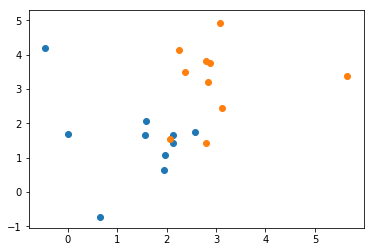

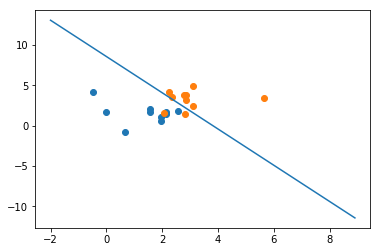

0.532292353991


In [9]:
#1/n (Xw-y)(wx-y)^t = 1/n SUM(xw1 + yw2 + w3 - y)^2
#der = (2/n SUM x(xw1 + yw2 + w3 - y), 2/n SUM y(xw1 + yw2 + w3 - y, 2/n SUM(xw1 + yw2 + w3 - y)
EPS = 0.1
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
def original_lambda(w, X, Y, grad):
    return 0.01
def steepest_lambda(w, X, Y, der):
    b = der(w, X, Y)
    c = b@(w.T@X.T@X - Y.T@X)
    d = b.T@X.T@X@b
    #print(c / d)
    return (c / d)
def Q(w,
      X,
      Y):
    mis = (X.dot(w.T) - Y)
    return ((mis.T).dot(mis)) / len(X)
def der_Q(w,
          X,
          Y):
    mis = np.array([0, 0, 0], dtype=np.float64)
    for i in range(3):
        for j in range(len(X)):
                mis[i] += X[j][i] * (X[j].dot(w.T) - Y[j]) 
    return 2 * (mis / len(X))
def gradient_descent(f,
                     grad,
                     X,
                     Y,
                     lamb,
                     steps=False):
    P = []
    point = np.array([np.random.rand() * 10 - 5,
                          np.random.rand() * 10 - 5,
                          np.random.rand() * 10 - 5],
                         dtype=np.float64)
    grad_vec = np.array([1, 1, 1], dtype=np.float64)
    prev_f = 10 ** 6
    cur_f = f(point, X, Y)
    P.append(cur_f)
    count_num_steps = 0
    while np.abs(prev_f - cur_f) > EPS:
        prev_f = cur_f
        grad_vec = grad(point, X, Y)
        point[0] -= lamb(point, X, Y, grad) * grad_vec[0]
        point[1] -= lamb(point, X, Y, grad) * grad_vec[1]
        point[2] -= lamb(point, X, Y, grad) * grad_vec[2]
        cur_f = f(point, X, Y)
        P.append(cur_f)
        #print(cur_f)
    if steps:
        return (point, cur_f, P)
    return (point, cur_f)

train_data, train_values = filling_data(1, 1, 3, 1)
train_data = make_prop(train_data)

n = len(train_data)
plt.scatter(list(map(lambda x: x[0], train_data[:n // 2])),
            list(map(lambda x: x[1], train_data[:n // 2])))
plt.scatter(list(map(lambda x: x[0], train_data[n // 2:])),
            list(map(lambda x: x[1], train_data[n // 2:])))
plt.show()

min_f = float('Inf')
min_point = np.array([0, 0, 0], dtype=np.float64)
for i in range(100):
    cur_point, cur_f = gradient_descent(Q, der_Q, train_data, train_values, original_lambda)
    if cur_f < min_f:
        min_f = cur_f
        min_point = cur_point
put_out(train_data, train_values, min_point)
print(min_f)

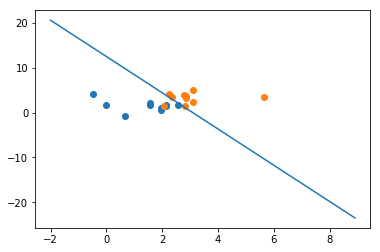

0.545549691273


In [10]:
min_f = float('Inf')
min_point = np.array([0, 0, 0], dtype=np.float64)
for i in range(100):
    cur_point, cur_f = gradient_descent(Q, der_Q, train_data, train_values, steepest_lambda)
    if cur_f < min_f:
        min_f = cur_f
        min_point = cur_point
put_out(train_data, train_values, min_point)
print(min_f)

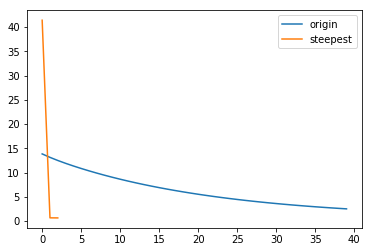

In [11]:
cur_point, cur_f, origin = gradient_descent(Q, der_Q, train_data, train_values, original_lambda, True)
cur_point, cur_f, steepest = gradient_descent(Q, der_Q, train_data, train_values, steepest_lambda, True)
P1 = np.arange(0, len(origin), 1)
P2 = np.arange(0, len(steepest), 1)
plt.plot(P1, origin, label = 'origin')
plt.plot(P2, steepest, label = 'steepest')
plt.legend()
plt.show()

### 6. Stochastic gradient descent

Sometimes you have so huge amount of data, that usual gradient descent becomes too slow. One more option, we have deal with data flow. In this case stochastic gradient method appears on the stage. The idea is simple. You can do a descent step, calculating error and gradient not for all samples, but for some small batch only.

#### Еxercises
1. Download [mnist](https://www.kaggle.com/c/digit-recognizer).
2. Train linear classificator for digits 0 and 1, using logistic loss function and stochastic gradient descent.
3. Use holdout to check [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) of classification.
4. How do accuracy and training time depend on bathch size?
5. Plot graphic that proves your words.
6. #### How many epochs you use? Why?
7. #### Plot value of loss function for each step (try use [exponential smoothing](https://en.wikipedia.org/wiki/Exponential_smoothing)).

In [18]:
import numpy as np
f = open('train.csv', 'r')
whole = 8816
train_data = np.zeros((int(whole * 0.8), 28 * 28))
train_values = np.zeros(int(whole * 0.8))
test_data = np.zeros((whole - int(whole * 0.8), 28 * 28))
test_values = np.zeros(whole - int(whole * 0.8))
cout = 0
for vector in f:
    vector.replace('\n', '')
    vector = vector.split(',')
    if vector[0] == 'label':
        continue
    if int(vector[0]) == 1 or int(vector[0]) == 0:
        row = np.array(list(map(int, vector[1:])), dtype=np.float128)
        row -= np.sum(row) / len(row)
        row /= np.max(row)
        if cout < int(whole * 0.8):
            if int(vector[0]) == 0:
                train_values[cout] = -1
            else:
                train_values[cout] = 1
            train_data[cout] = np.array([row])
        else:
            if int(vector[0]) == 0:
                test_values[cout - whole] = -1
            else:
                test_values[cout - whole] = 1
            test_data[cout - whole] = np.array([row])
        cout += 1
train_data = make_prop(train_data)
test_data = make_prop(test_data)

In [19]:
def printNum(vector):
    from skimage.filters import threshold_mean
    import matplotlib
    import numpy as np
    import matplotlib.pyplot as plt

    image = np.array(vector).reshape(28, 28)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.show()
def gen_batch(X,
              Y,
              k):
    l = np.arange(0, len(X), 1)
    np.random.shuffle(l)
    batch = np.zeros((k, len(X[0])))
    batch_y = np.zeros(k)
    for i in range(len(batch_y)):
        batch[i] = np.array([X[l[i]]])
        batch_y[i] = Y[l[i]]
    #for i in range(len(batch_y)):
        #printNum(batch[i][:-1])
    return(batch, batch_y)

In [25]:
#ln(1+exp(−ywTx))
#der_wi = ln(1+exp(−y(x1w1+x2w2+...+wn)))' = 1/(1+exp(−y(x1w1+x2w2+...+wn))) * -yxi * exp(−y(x1w1+x2w2+...+wn)
import time as t
EPS = 0.1
lamb = 0.1
def LF(w,
      X,
      Y):
    mis = np.zeros(len(Y), dtype=np.float128)
    mis = np.log(1 + np.exp(-(X@(w.T) * Y)))
    return np.sum(mis)
def der_LF(w,
           X,
           Y):
    mis = np.zeros(len(w), dtype=np.float128)
    for i in range(len(mis)):
        for j in range(len(X)):
            a = np.array([1], dtype=np.float128)
            a[0] = (X[j]@w.T) * (-Y[j])
            a[0] = (1 / (np.exp(a[0]) + 1))
            a[0] = (1  - a[0]) *  X[j][i] * (-Y[j])
            mis[i] += a[0]
    return mis
def stochastic_descent(f,
                       grad,
                       X,
                       Y,
                       batch_size=2):
    point = np.random.random(len(X[0]))
    prev_f = 10 ** 6
    cur_f = f(point, X, Y)
    while np.abs(prev_f - cur_f) > EPS:
        prev_f = cur_f
        batch, batch_y = gen_batch(X, Y, batch_size)
        grad_vec = grad(point, batch, batch_y)
        #lamb = 0.01 / (np.max(np.abs(grad_vec)))
        for i in range(len(point)):
            point[i] -= lamb * grad_vec[i]
        cur_f = f(point, X, Y)
        #print("f", cur_f)
    return (point, cur_f)

min_point, min_f = stochastic_descent(LF, der_LF, train_data, train_values)
for i in range(1, 3):
    print('will be ready in', 3 - i)
    cur_point, cur_f = stochastic_descent(LF, der_LF, train_data, train_values)
    if cur_f < min_f:
        min_f = cur_f
        min_point = cur_point

will be ready in 2
will be ready in 1


In [26]:
def score(X,
          Y,
          w):
    a = X@(w.T)
    score = 0
    for i in range(len(a)):
        if (a[i] > 0 and Y[i] == -1) or (a[i] < 0 and Y[i] == 1):
            score += 1
    return (1 - score / len(Y))
score(test_data, test_values, min_point)

0.9943310657596371

will be ready in 100
will be ready in 99
will be ready in 98
will be ready in 97
will be ready in 96
will be ready in 95
will be ready in 94
will be ready in 93
will be ready in 92
will be ready in 91
will be ready in 90
will be ready in 89
will be ready in 88
will be ready in 87
will be ready in 86
will be ready in 85
will be ready in 84
will be ready in 83
will be ready in 82
will be ready in 81
will be ready in 80
will be ready in 79
will be ready in 78
will be ready in 77
will be ready in 76
will be ready in 75
will be ready in 74
will be ready in 73
will be ready in 72
will be ready in 71
will be ready in 70
will be ready in 69
will be ready in 68
will be ready in 67
will be ready in 66
will be ready in 65
will be ready in 64
will be ready in 63
will be ready in 62
will be ready in 61
will be ready in 60
will be ready in 59
will be ready in 58
will be ready in 57
will be ready in 56
will be ready in 55
will be ready in 54
will be ready in 53
will be ready in 52
will be ready in 51

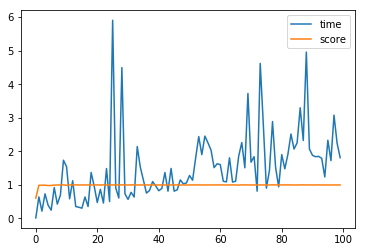

In [16]:
import time as t
max_k = 100
P1 = np.arange(0,max_k, 1, dtype=np.float32)
P2 = np.arange(0,max_k, 1, dtype=np.float32)
P3 = np.arange(0,max_k, 1, dtype=np.float32)
for k in range(max_k):
    print('will be ready in', max_k - k)
    start = t.time()
    point, f = stochastic_descent(LF, der_LF, train_data, train_values, k)
    time_work = t.time() - start
    P1[k] = time_work
    P2[k] = score(test_data, test_values, point)
plt.plot(P3, P1, label = 'time')
plt.plot(P3, P2, label = 'score')
plt.legend()
plt.show()

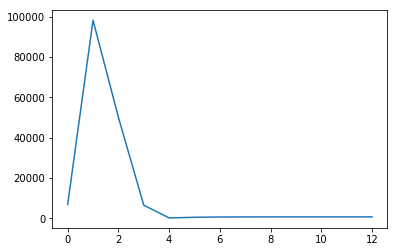

In [17]:
alpha = 0.7
P1 = []
P2 = []
def stochastic_descent_expotential_smoothig(f,
                       grad,
                       X,
                       Y,
                       batch_size=2):
    point = np.random.random(len(X[0]))
    prev_f = 10 ** 6
    cur_f = f(point, X, Y)
    while np.abs(prev_f - cur_f) > EPS:
        batch, batch_y = gen_batch(X, Y, batch_size)
        if prev_f == 10 ** 6:
            prev_der = grad(point, batch, batch_y)
        
        cur_der = grad(point, batch, batch_y) * alpha + (1 - alpha) * prev_der
        prev_der = cur_der
        prev_f = cur_f
        for i in range(len(point)):
            point[i] -= cur_der[i]
        
        P2.append(len(P1))
        P1.append(cur_f)
        cur_f = f(point, X, Y)
    return (point, cur_f)
min_point, min_f = stochastic_descent_expotential_smoothig(LF, der_LF, train_data, train_values)
plt.plot(P2, P1)
plt.show()

#### Momentum method
Stochastic gradient descent with momentum remembers the update of $x$ at each iteration, and determines the next update as a linear combination of the gradient and the previous update
$$x^{k+1} = x^{k} - s^{k},$$ where $s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k)$, $0 <\gamma < 1$ – smoothing ratio and $s^{-1} = 0$.

#### Еxercises
1. Find minimum for $Q(x,y)=10x^2+y^2$ with descent method.
2. Use momentum method and compare pathes.
3. How do you choose $\gamma$?

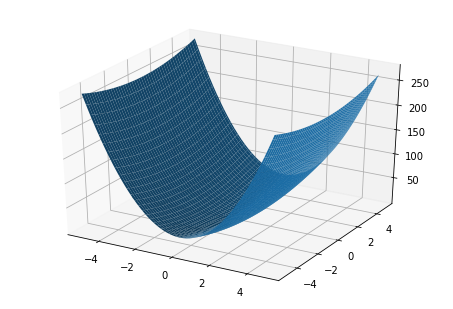

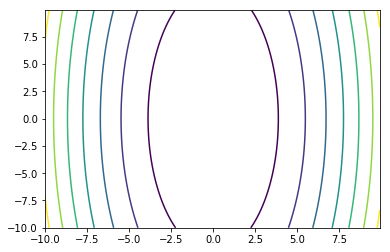

[ 0.02952737  0.00537946]


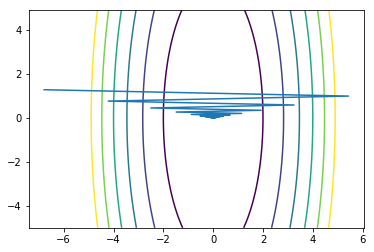

[ -7.36960187e-11   4.98994218e-01]


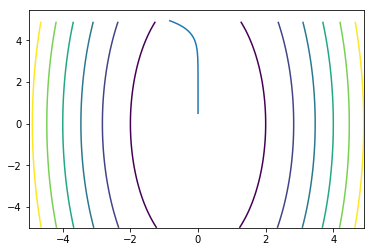

In [6]:
#f(x, y) = 10x^2 + y^2
#gard(x0, y0) = (20x0)i + (2y0)j = (20x0, 2y0)
X_plot = []
Y_plot = []
def f2(x, y):
    return 10 * (x ** 2) + y ** 2
def grad2(point):
    x0 = point[0]
    y0 = point[1]
    new_point = np.array([20 * x0, 2 * y0])
    return new_point
def gr_descent(f, grad):
    X_plot.clear(); Y_plot.clear()
    point = np.random.random(2) * 10 - 5
    X_plot.append(point[0])
    Y_plot.append(point[1])
    cur_f = f(point[0], point[1])
    prev_f = 10 ** 6
    while np.abs(prev_f - cur_f) > EPS:
        grad_vec = grad(point)
        for i in range(len(point)):
            point[i] -= lambd * grad_vec[i]
        
        X_plot.append(point[0])
        Y_plot.append(point[1])
        prev_f = cur_f
        cur_f = f(point[0], point[1])
    return (point)
def momentum_desent(f, grad):
    X_plot.clear()
    Y_plot.clear()
    point = np.random.random(2) * 20 - 10
    prev_f = 10 ** 6
    cur_f = f(point[0], point[1])
    while np.abs(prev_f - cur_f) > EPS:
        if prev_f == 10 ** 6:
            prev_der = 0.001 / (gamma + lambd) * grad(point)
        
        cur_der = gamma * prev_der + lambd * grad(point)
        prev_der = cur_der
        prev_f = cur_f
        for i in range(len(point)):
            point[i] -= cur_der[i]
        
        X_plot.append(point[0])
        Y_plot.append(point[1])
        cur_f = f(point[0], point[1])
        #print(cur_f)
    return (point)

stereo(f2, -5, 5)
contour(f2)
gamma = 0.1
lambd = 0.1
EPS = 0.01
print(momentum_desent(f2, grad2))
trace(f2, X_plot, Y_plot, -5, 5)
lambd = 0.001
EPS = 0.001
print(gr_descent(f2, grad2))
trace(f2, X_plot, Y_plot, -5, 5)


#### Nesterov accelerated gradient
And the logical development of this approach leads to the accelerated Nesterov's gradient. The descent step is calculated a little differently
$$s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k - \gamma s^{k-1}),$$
so we find gradient at the point which moment will move us.

#### Еxercises
1. Compare this method and previous with Rosenbrock function.
2. Plot traces of both algorithms.

In [7]:
def nesterov_desent(f, grad):
    X_plot.clear()
    Y_plot.clear()
    point = np.random.random(2) * 20 - 10
    prev_f = 10 ** 6
    cur_f = f(point[0], point[1])
    while np.abs(prev_f - cur_f) > EPS:
        #print(point)
        if prev_f == 10 ** 6:
            prev_der = 0.001 / (gamma + lambd) * grad(point)
        
        cur_der = gamma * prev_der + lambd * grad(point - gamma * prev_der)
        prev_der = cur_der
        prev_f = cur_f
        for i in range(len(point)):
            point[i] -= cur_der[i]
        
        X_plot.append(point[0])
        Y_plot.append(point[1])
        cur_f = f(point[0], point[1])
        #print(cur_f)
    return (point)

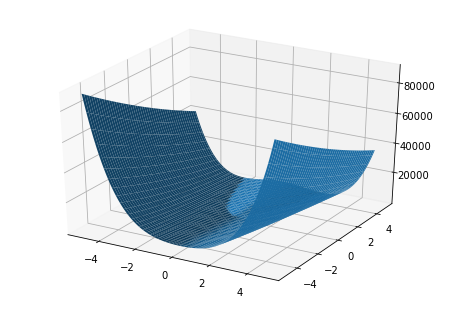

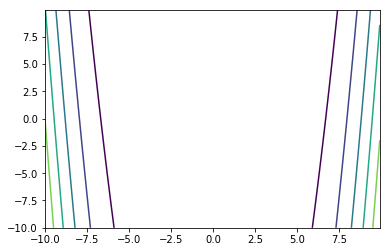

[ 0.89728978  0.80469196]


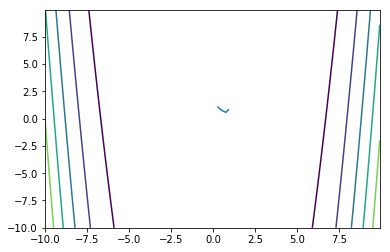

In [11]:
stereo(f1, -5, 5)
contour(f1)

gamma = 0.00006
lambd = 0.0001
EPS = 0.000001
print(momentum_desent(f1, grad1))
trace(f1, X_plot, Y_plot, -10, 10)

[ 0.89729073  0.80469367]


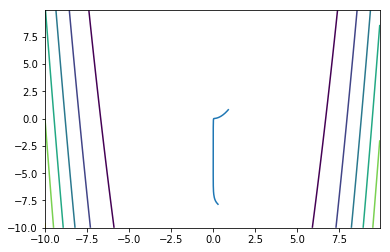

In [82]:
gamma = 0.00006
lambd = 0.0001
EPS = 0.000001
print(nesterov_desent(f1, grad1))
trace(f1, X_plot, Y_plot, -10, 10)

#### Adagrad (2011)
Adaptive gradient finds lambda for each dimension of the input vector x. Informally speaking, for sparce features it makes a bigger step, but for regular ones smaller step.
$$x_{i}^{k + 1} = x_{i}^{k} - \frac{\lambda}{\sqrt{G_{i, i}^k } + \varepsilon} \cdot \frac{\partial Q}{\partial x_i}(x^k),$$
* $G^{k} = \sum_{t=1}^{k}g_t g_t^{T}$, где $g_t = \triangledown Q(x^t)$.
* $\varepsilon$ - epsilon to avoid division by zero.
It improves convergence of the learning process (e.g. when using neural networks for text).

#### RMSprop
To avoid growth of the denominator we can use the following modification. Let's calculate the matrix $G^k$ only for a small number of latest steps, it can be done for example using exponential smoothing.
$$G^{k+1} = \gamma G^{k} + (1 - \gamma)g_{k+1}g_{k+1}^{T},$$
where $0< \gamma < 1$ - smoothing factor

#### Еxercises
1. Read about adadelta and adam (links below).
2. Give an example of a function that can show the difference in the studied stohastic gradient methods.
3. #### Show animation step by step how methods work.
4. Use your favorite method on mnist dataset again.
5. #### Show convergence of alrotigthm.
6. Check quality, using holdout.

#### Papers
1. [Adadelta (2012)](https://arxiv.org/pdf/1212.5701.pdf)
2. [Adam (2015)](https://arxiv.org/pdf/1412.6980.pdf)

In [12]:
def adadelta_descent(f, grad):
    p = 0.6
    eps = 0.0001
    X_plot.clear(); Y_plot.clear()
    point = np.random.random(2) * 10 - 5
    X_plot.append(point[0])
    Y_plot.append(point[1])
    cur_f = f(point[0], point[1])
    prev_f = 10 ** 6
    Eg2 = np.zeros(2)
    Edx2 = np.zeros(2)
    while np.abs(prev_f - cur_f) > EPS:
        grad_vec = grad(point)
        Eg2 = p * Eg2 + (1 - p) * (grad_vec ** 2)
        dx = -(np.sqrt(Edx2 + eps)) / (np.sqrt(Eg2 + eps)) * grad_vec
        Edx2 = p * Edx2 + (1 - p) * (dx@dx.T) 
        for i in range(len(point)):
            point[i] += dx[i]
        X_plot.append(point[0])
        Y_plot.append(point[1])
        prev_f = cur_f
        cur_f = f(point[0], point[1])
    return (point)

In [33]:
def adam_descent(f, grad):
    alpha = 0.001
    beta1 = 0.9
    beta2 = 0.99
    eps = 10 ** (-8)
    X_plot.clear(); Y_plot.clear()
    point = np.random.random(2) * 10 - 5
    X_plot.append(point[0])
    Y_plot.append(point[1])
    cur_f = f(point[0], point[1])
    
    prev_f = 10 ** 6
    mt = np.zeros(2)
    vt = np.zeros(2)
    t = 0
    while np.abs(prev_f - cur_f) > EPS:
        t += 1
        grad_vec = grad(point)
        mt = beta1 * mt+ (1 - beta1) * grad_vec
        vt = beta2 * vt+ (1 - beta2) * (grad_vec ** 2)
        dx = - alpha * (mt / (1 - beta1 ** t)) / (np.sqrt(vt / (1 - beta2 ** t)) + eps)
        
        for i in range(len(point)):
            point[i] += dx[i]
        X_plot.append(point[0])
        Y_plot.append(point[1])
        prev_f = cur_f
        cur_f = f(point[0], point[1])
    return (point)

In [42]:
def magic(f, x, y, a=-10, b=10):
    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib import animation
    fig = plt.figure()
    ax = plt.axes(xlim=(a, b), ylim=(a, b))
    line, = ax.plot([], [], lw=2)
    def init():
        contour(f)
        line.set_data([], [])
        return line,
    def animate(i):
        line.set_data(x[:i], y[:i])
        return line,
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=100, interval=20, blit=True)

    # save the animation as an mp4.  This requires ffmpeg or mencoder to be
    # installed.  The extra_args ensure that the x264 codec is used, so that
    # the video can be embedded in html5.  You may need to adjust this for
    # your system: for more information, see
    # http://matplotlib.sourceforge.net/api/animation_api.html
    anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
    plt.show()


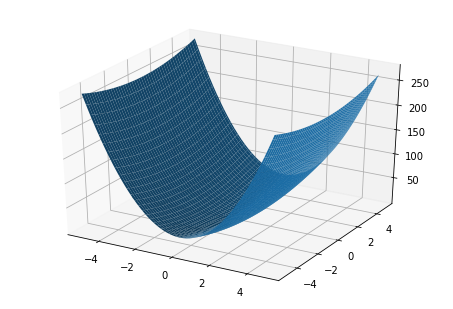

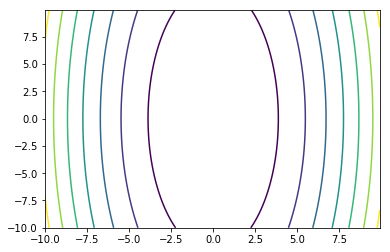

[-0.03063932  0.02942517]


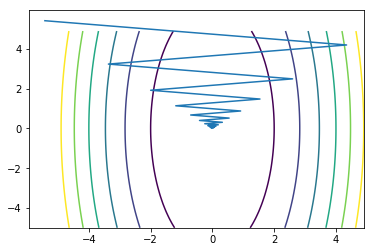

[  1.35417257e-05  -1.30267822e-01]


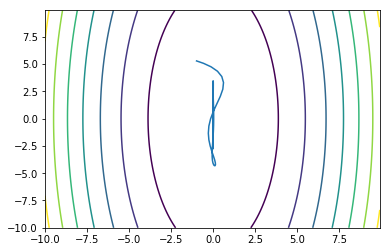

[  2.68382274e-02   4.65211652e-07]


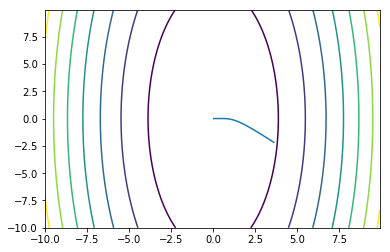

[ -5.72757429e-01   3.21605471e-06]


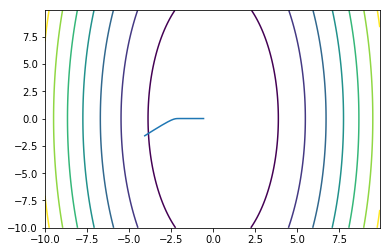

In [62]:
stereo(f2, -5, 5)
contour(f2)
gamma = 0.1
lambd = 0.1
EPS = 0.01
print(momentum_desent(f2, grad2))
trace(f2, X_plot, Y_plot, -5, 5)
gamma = 1
lambd = 0.01
EPS = 0.01
print(nesterov_desent(f2, grad2))
trace(f2, X_plot, Y_plot, -10, 10)

print(adadelta_descent(f2, grad2))
trace(f2, X_plot, Y_plot, -10, 10)

print(adam_descent(f2, grad2))
trace(f2, X_plot, Y_plot, -10, 10)

In [60]:
def adam_descent_mnist(f,
                       grad,
                       X,
                       Y,
                       batch_size=10):
    alpha = 0.001
    beta1 = 0.9
    beta2 = 0.99
    eps = 10 ** (-8)
    point = np.random.random(len(X[0]))
    prev_f = 10 ** 6
    mt = np.zeros(len(point))
    vt = np.zeros(len(point))
    t = 0
    cur_f = f(point, X, Y)
    while np.abs(prev_f - cur_f) > EPS:
        t += 1
        
        batch, batch_y = gen_batch(X, Y, batch_size)
        grad_vec = grad(point, batch, batch_y)
        mt = beta1 * mt+ (1 - beta1) * grad_vec
        vt = beta2 * vt+ (1 - beta2) * (grad_vec ** 2)
        dx = - alpha * (mt / (1 - beta1 ** t)) / (np.sqrt(vt / (1 - beta2 ** t)) + eps)
        for i in range(len(point)):
            point[i] += dx[i]
        prev_f = cur_f
        cur_f = f(point, X, Y)
        if t % 50 == 0:
            print("current", cur_f)
    return (point, cur_f)
min_point, min_f = adam_descent_mnist(LF, der_LF, train_data, train_values)
score(test_data, test_values, min_point)

current 2309.95720861
current 978.761352836
current 567.415389807
current 395.871957001
current 301.302046578
current 240.021925606
current 194.183861491
current 159.283215803
current 135.71639542


0.9971655328798186